In [2]:
# Import necessary libraries
import pandas as pd
from scipy.stats import kendalltau
import matplotlib.pyplot as plt


In [3]:
# Load data from the Excel file
df = pd.read_excel('Thesis_V6.xlsx')


In [4]:
# Removing any rows with NaN values
df.dropna(inplace=True)

In [5]:
# Extract values from the columns
sand_content = df['Sand content']
silt_content = df['Silt content']
clay_content = df['Clay content']
rock_type = df['Rock type']

recharge_fraction = df['Recharge fraction']


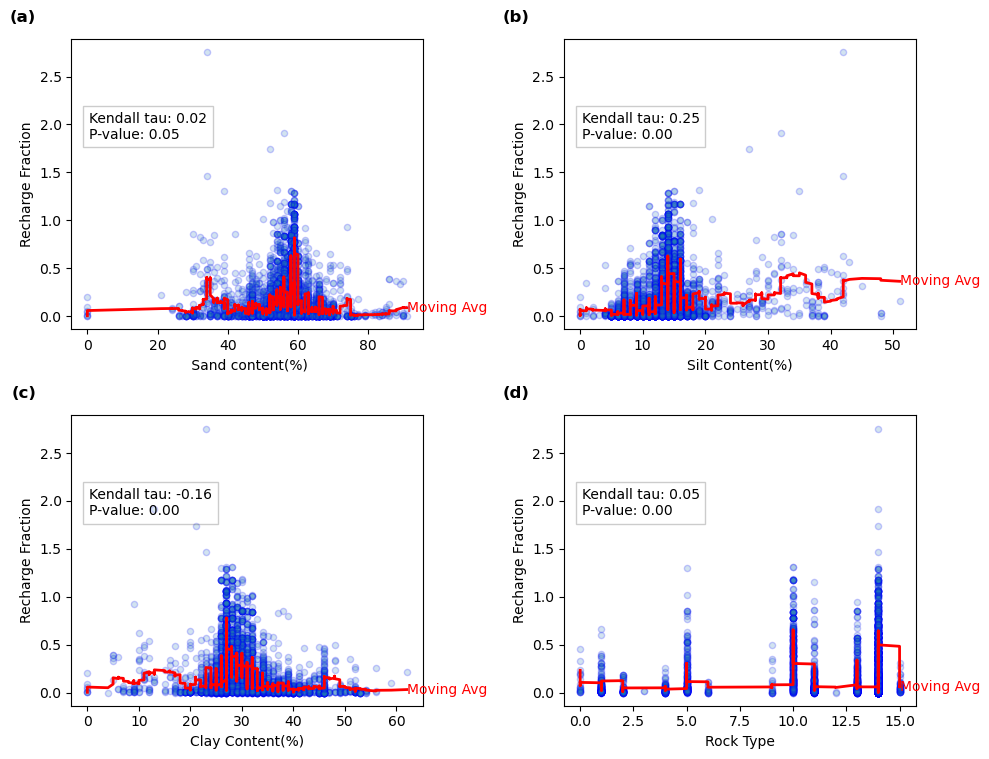

In [10]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Define plot data and labels
plot_data = [
    (sand_content, recharge_fraction, ' Sand content(%)', axes[0, 0], '(a)'),
    (silt_content, recharge_fraction, 'Silt Content(%)', axes[0, 1], '(b)'),
    (clay_content, recharge_fraction, 'Clay Content(%)', axes[1, 0], '(c)'),

    (rock_type, recharge_fraction, 'Rock Type', axes[1, 1], '(d)')
]

# Moving Average Window Size
window_size = 30  

# Loop through data and create scatter plots
for i, (x_data, y_data, xlabel, ax, subplot_label) in enumerate(plot_data):
    # Calculate Kendall's Tau correlation
    tau, p_value_kendall = kendalltau(x_data, y_data)
    
    # Scatter plot
    ax.scatter(x_data, y_data, marker='o', s=20, alpha=0.2, edgecolors='b')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Recharge Fraction')
    
    # Add simple mooving average(SMA) for visualizing general trend of the data
    sorted_df = pd.DataFrame({xlabel: x_data, 'Recharge Fraction': y_data}).sort_values(by=xlabel)
    sorted_df['SMA'] = sorted_df['Recharge Fraction'].rolling(window=window_size, min_periods=1).mean()
    
    # Plot moving average as a red line
    ax.plot(sorted_df[xlabel], sorted_df['SMA'], color='red', linewidth=2, label='Moving Average')

    # Annotate Moving Average on the Right Side
    last_x = sorted_df[xlabel].iloc[-1]  # Last x value
    last_y = sorted_df['SMA'].iloc[-1]   # Last SMA value
    ax.text(last_x, last_y, "Moving Avg", color='red', fontsize=10, verticalalignment='center')

    # Annotate Kendall's tau and p-value
    text_x = 0.05  # Default x-axis position
    textstr = f"Kendall tau: {tau:.2f}\nP-value: {p_value_kendall:.2f}"
    ax.text(text_x, text_y, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.2))
    
    # Add subplot label 
    ax.text(-0.1, 1.1, subplot_label, transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Show plot
plt.show()
